In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
import numpy as np
import pathlib
import matplotlib.pyplot as plt
from os.path import dirname, join as pjoin
import scipy.io as sio
import h5py
import hdf5storage
import random

In [2]:
housenumbers_train_orig = tf.keras.utils.get_file(
    origin='http://ufldl.stanford.edu/housenumbers/train.tar.gz',
    fname='train',
    untar=True
)
housenumbers_train_path = pathlib.Path(housenumbers_train_orig)
print(housenumbers_train_path)

/home/maxim/.keras/datasets/train


In [3]:
housenumbers_test_orig = tf.keras.utils.get_file(
    origin='http://ufldl.stanford.edu/housenumbers/test.tar.gz',
    fname='test',
    untar=True
)
housenumbers_test_path = pathlib.Path(housenumbers_test_orig)
print(housenumbers_test_path)

/home/maxim/.keras/datasets/test


In [4]:
housenumbers_train32_orig = tf.keras.utils.get_file(
    origin='http://ufldl.stanford.edu/housenumbers/train_32x32.mat',
    fname='train_32x32'
)
housenumbers_train32_path = pathlib.Path(housenumbers_train32_orig)
print(housenumbers_train32_path)

/home/maxim/.keras/datasets/train_32x32


In [5]:
housenumbers_test32_orig = tf.keras.utils.get_file(
    origin='http://ufldl.stanford.edu/housenumbers/test_32x32.mat',
    fname='test_32x32'
)
housenumbers_test32_path = pathlib.Path(housenumbers_test32_orig)
print(housenumbers_test32_path)

/home/maxim/.keras/datasets/test_32x32


In [6]:
def show_images_grid(images_array):
    fig = plt.figure(figsize = (20, 20))
    number_of_images = images_array.shape[0]
    for i in range(1, 5):
        idx = random.randint(0, number_of_images - 1)
        row_plot = fig.add_subplot(2,4,i)
        row_plot.imshow(images_array[idx])
    plt.show()
    plt.close()

In [7]:
# with h5py.File(str(housenumbers_train_path) + '/digitStruct.mat', 'r') as f:
#     print(f.keys())
#     print(f['#refs#'])
#     print(f['digitStruct']['name'][0, 0])
train32_mat = sio.loadmat('/home/maxim/.keras/datasets/train_32x32')

test32_mat = sio.loadmat('/home/maxim/.keras/datasets/test_32x32')

In [8]:
train32_x = train32_mat['X']
train32_y = train32_mat['y']

test32_x = test32_mat['X']
test32_y = test32_mat['y']

x_train, y_train = train32_x.transpose((3,0,1,2)), train32_y[:,0]

x_test, y_test = test32_x.transpose((3,0,1,2)), test32_y[:,0]

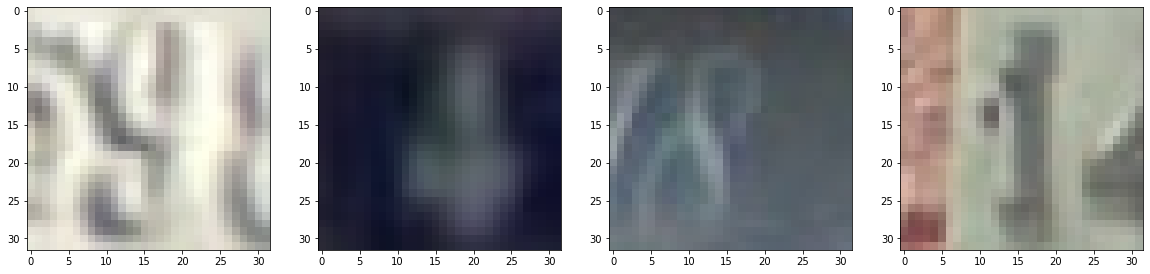

In [9]:
# show random train images
show_images_grid(x_train)

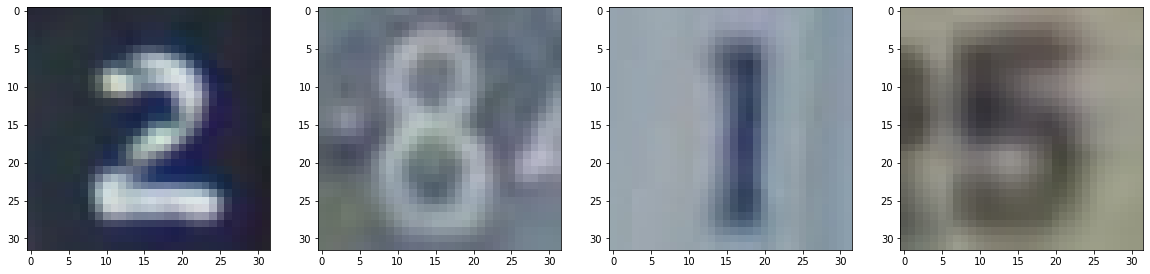

In [10]:
# show random test images
show_images_grid(x_test)

In [12]:
VALIDATION_SET_RATE = 0.05

# define image generators for train, validation and test set
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=VALIDATION_SET_RATE
)

test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=VALIDATION_SET_RATE
)

BATCH_SIZE = 32
IMG_HEIGHT = 32
IMG_WIDTH = 32
IMG_CHANNELS = 3
EPOCHS_COUNT = 5

num_classes = 10 # (0-9)

# + 1 here is because in labels we have 10 as different class, idk why
y_train = tf.keras.utils.to_categorical(y_train, num_classes + 1)
y_test = tf.keras.utils.to_categorical(y_test, num_classes + 1)


STEPS_PER_EPOCH = np.ceil(len(x_train)/BATCH_SIZE)
image_generator.fit(x_train)
test_image_generator.fit(x_test)

In [15]:
# Define 1 input 2 conv and 1 fc layer with softmax output
input_layer = layers.Input(
    shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
    name='input'
)

conv_1 = layers.Conv2D(
    filters=16,
    kernel_size=(3, 3),
    strides=(1,1),
    padding='same',
    activation='relu',
    name='conv_1'
)

conv_2 = layers.Conv2D(
    filters=40,
    kernel_size=(3, 3),
    strides=(1,1),
    padding='same',
    activation='relu',
    name='conv_2'
)

fc_1 = layers.Dense(128, activation='relu', name='fc_1')
out = layers.Dense(11, activation='softmax', name='output')

two_conv_model = keras.Sequential([
    input_layer,
    conv_1,
    conv_2,
    layers.Flatten(),
    fc_1,
    out
])
two_conv_model.summary()

# compile the model
two_conv_model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
conv_2 (Conv2D)              (None, 32, 32, 40)        5800      
_________________________________________________________________
flatten_1 (Flatten)          (None, 40960)             0         
_________________________________________________________________
fc_1 (Dense)                 (None, 128)               5243008   
_________________________________________________________________
output (Dense)               (None, 11)                1419      
Total params: 5,250,675
Trainable params: 5,250,675
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = two_conv_model.fit_generator(
   image_generator.flow(x_train, y_train),
#     validation_data=validation_data_gen,
    steps_per_epoch=STEPS_PER_EPOCH,
#     validation_steps=STEPS_PER_EPOCH_VALIDATION,
    epochs=EPOCHS_COUNT
)

  ...
    to  
  ['...']
Train for 2290.0 steps
Epoch 1/5
2290/2290 [==============================] - 67s 29ms/step - loss: 1.9910 - accuracy: 0.3017
Epoch 2/5
2290/2290 [==============================] - 72s 32ms/step - loss: 0.8601 - accuracy: 0.7444
Epoch 3/5
2290/2290 [==============================] - 72s 31ms/step - loss: 0.6204 - accuracy: 0.8180
Epoch 4/5
2290/2290 [==============================] - 72s 31ms/step - loss: 0.5178 - accuracy: 0.8484
Epoch 5/5
2290/2290 [==============================] - 71s 31ms/step - loss: 0.4472 - accuracy: 0.8694


In [ ]:
# x_test[0]
two_conv_model.evaluate(test_image_generator.flow(x_test, y_test))